## Preprocessing

In [1]:
 # Import the required modules
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# tensorflow
import tensorflow as tf

# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

#  Import and read the charity_data.csv.
import pandas as pd
pd.set_option('display.max_columns', None)

application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
new_df = application_df.copy()
new_df = new_df.drop(["EIN", "NAME"], axis=1)
new_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
new_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
new_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ["T2","T9","T12","T13","T14","T15","T17","T25","T29"]

# Replace in dataframe
for app in application_types_to_replace:
    new_df['APPLICATION_TYPE'] = new_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
new_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
new_df["CLASSIFICATION"].value_counts() <500

C1000    False
C2000    False
C1200    False
C3000    False
C2100    False
         ...  
C4120     True
C8210     True
C2561     True
C4500     True
C2150     True
Name: CLASSIFICATION, Length: 71, dtype: bool

In [7]:
# Credit to prof Booth for help with code
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df["CLASSIFICATION"].value_counts().loc[new_df["CLASSIFICATION"].value_counts() < 700]

C1700    287
C4000    194
C5000    116
C1270    114
C2700    104
        ... 
C4120      1
C8210      1
C2561      1
C4500      1
C2150      1
Name: CLASSIFICATION, Length: 65, dtype: int64

In [8]:
# Credit to Prof Booth for help with code
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(new_df["CLASSIFICATION"].value_counts().loc[new_df["CLASSIFICATION"].value_counts() <700].index)
# Replace in dataframe
for cls in classifications_to_replace:
    new_df['CLASSIFICATION'] = new_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
new_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
new_df = pd.get_dummies(new_df)
new_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [10]:
# Split our preprocessed data into our features and target arrays
X = new_df.drop("IS_SUCCESSFUL", axis=1)
y = new_df.IS_SUCCESSFUL

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

print(X_train.shape)
print(X_test.shape)

(25724, 44)
(8575, 44)


In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn_model1 = tf.keras.models.Sequential()

# First hidden layer
nn_model1.add(tf.keras.layers.Dense(units=4, activation="relu", input_dim=len(X.columns)))

# Second hidden layer
nn_model1.add(tf.keras.layers.Dense(units=3, activation="relu"))

# Output layer
nn_model1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 180       
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 199 (796.00 Byte)
Trainable params: 199 (796.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Compile the model
nn_model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [14]:
# Train the model
fit_model = nn_model1.fit(X_train_scaled, y_train, epochs=500)

Epoch 1/500
804/804 [==============================] - 5s 3ms/step - loss: 0.6468 - accuracy: 0.6602
Epoch 2/500
804/804 [==============================] - 4s 5ms/step - loss: 0.5898 - accuracy: 0.7117
Epoch 3/500
804/804 [==============================] - 3s 4ms/step - loss: 0.5825 - accuracy: 0.7125
Epoch 4/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5793 - accuracy: 0.7149
Epoch 5/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5769 - accuracy: 0.7161
Epoch 6/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5749 - accuracy: 0.7163
Epoch 7/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5719 - accuracy: 0.7167
Epoch 8/500
804/804 [==============================] - 1s 2ms/step - loss: 0.5700 - accuracy: 0.7177
Epoch 9/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5658 - accuracy: 0.7199
Epoch 10/500
804/804 [==============================] - 2s 2ms/step - loss: 0.5607 - accura

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5603 - accuracy: 0.7261 - 433ms/epoch - 2ms/step
Loss: 0.5602706074714661, Accuracy: 0.726064145565033


In [16]:
def doClassification_NN(nn_model1, X_train, X_test, y_train, y_test):
    # predict
    train_preds = nn_model1.predict(X_train)
    train_preds = tf.greater(train_preds, .5)
    train_probs = nn_model1.predict(X_train)

    test_preds = nn_model1.predict(X_test)
    test_preds = tf.greater(test_preds, .5)
    test_probs = nn_model1.predict(X_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix:
    {train_cm}

    Train Report:
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs)
    roc_auc = roc_auc_score(y_train, train_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix:
    {test_cm}

    Test Report:
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs)
    roc_auc = roc_auc_score(y_test, test_probs)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TESTING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

268/268 [==============================] - 0s 2ms/step
TRAINING METRICS

    Train Confusion Matrix:
    [[ 7856  4189]
 [ 2757 10922]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.74      0.65      0.69     12045
           1       0.72      0.80      0.76     13679

    accuracy                           0.73     25724
   macro avg       0.73      0.73      0.73     25724
weighted avg       0.73      0.73      0.73     25724

    



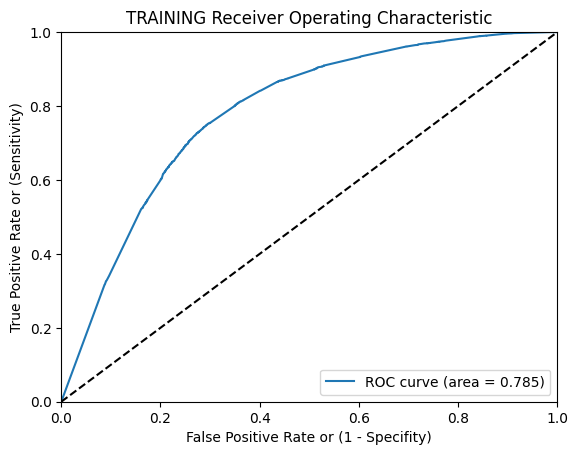



TESTING METRICS

    Test Confusion Matrix:
    [[2573 1420]
 [ 929 3653]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.73      0.64      0.69      3993
           1       0.72      0.80      0.76      4582

    accuracy                           0.73      8575
   macro avg       0.73      0.72      0.72      8575
weighted avg       0.73      0.73      0.72      8575

    



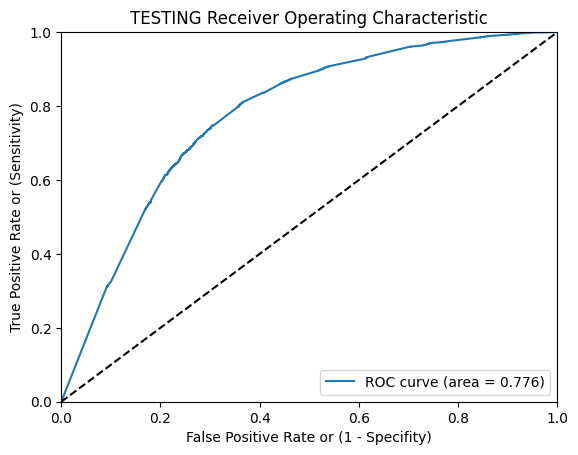

In [17]:
doClassification_NN(nn_model1, X_train_scaled, X_test_scaled, y_train, y_test)

In [18]:
# Define a new model with updated parameters  - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn_model2 = tf.keras.models.Sequential()

# First hidden layer
nn_model2.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=len(X.columns)))

# Second hidden layer
nn_model2.add(tf.keras.layers.Dense(units=8, activation="relu"))

# Third hidden layer
nn_model2.add(tf.keras.layers.Dense(units=3, activation="relu"))

# Output layer
nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model2.summary()

# Compile the new model
nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the new model
fit_model = nn_model2.fit(X_train_scaled, y_train, epochs=500)

# Evaluate the new model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                720       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
 dense_6 (Dense)             (None, 1)                 4         
                                                                 
Total params: 887 (3.46 KB)
Trainable params: 887 (3.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
804/804 [==============================] - 3s 2ms/step - loss: 0.6287 - accuracy: 0.6669
Epoch 2/500
804/804 [==============================] - 

268/268 [==============================] - 0s 1ms/step
TRAINING METRICS

    Train Confusion Matrix:
    [[ 8223  3822]
 [ 2846 10833]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.74      0.68      0.71     12045
           1       0.74      0.79      0.76     13679

    accuracy                           0.74     25724
   macro avg       0.74      0.74      0.74     25724
weighted avg       0.74      0.74      0.74     25724

    



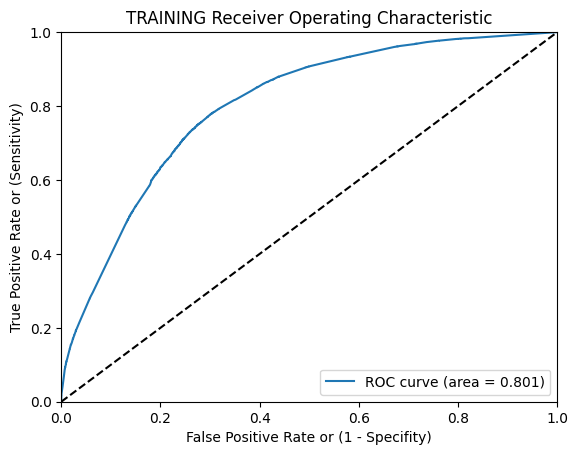



TESTING METRICS

    Test Confusion Matrix:
    [[2679 1314]
 [1008 3574]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.73      0.67      0.70      3993
           1       0.73      0.78      0.75      4582

    accuracy                           0.73      8575
   macro avg       0.73      0.73      0.73      8575
weighted avg       0.73      0.73      0.73      8575

    



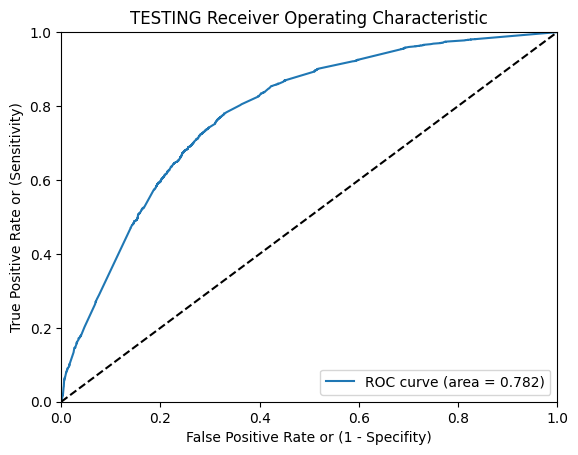

In [19]:
doClassification_NN(nn_model2, X_train_scaled, X_test_scaled, y_train, y_test)

In [20]:
# Define a new model with updated parameters  - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn_model3 = tf.keras.models.Sequential()

# First hidden layer
nn_model3.add(tf.keras.layers.Dense(units=25, activation="relu", input_dim=len(X.columns)))

# Second hidden layer
nn_model3.add(tf.keras.layers.Dense(units=16, activation="relu"))

# Third hidden layer
nn_model3.add(tf.keras.layers.Dense(units=9, activation="relu"))

# Fourth hidden layer
nn_model3.add(tf.keras.layers.Dense(units=5, activation="relu"))

# Output layer
nn_model3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model3.summary()

# Compile the new model
nn_model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the new model
fit_model = nn_model3.fit(X_train_scaled, y_train, epochs=500)

# Evaluate the new model using the test data
model_loss, model_accuracy = nn_model3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 25)                1125      
                                                                 
 dense_8 (Dense)             (None, 16)                416       
                                                                 
 dense_9 (Dense)             (None, 9)                 153       
                                                                 
 dense_10 (Dense)            (None, 5)                 50        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1750 (6.84 KB)
Trainable params: 1750 (6.84 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
804/804 [=

268/268 [==============================] - 0s 1ms/step
TRAINING METRICS

    Train Confusion Matrix:
    [[ 8227  3818]
 [ 2794 10885]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.75      0.68      0.71     12045
           1       0.74      0.80      0.77     13679

    accuracy                           0.74     25724
   macro avg       0.74      0.74      0.74     25724
weighted avg       0.74      0.74      0.74     25724

    



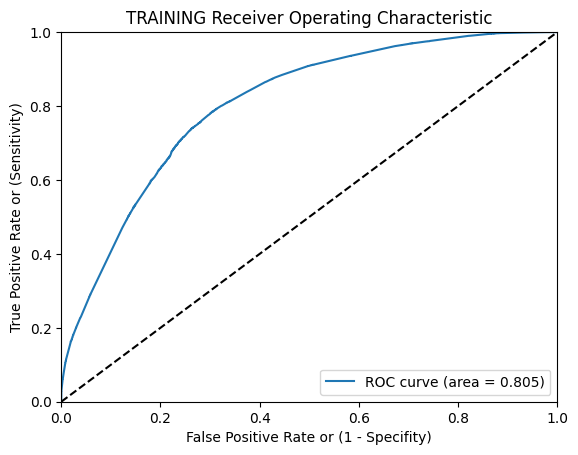



TESTING METRICS

    Test Confusion Matrix:
    [[2652 1341]
 [1005 3577]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.73      0.66      0.69      3993
           1       0.73      0.78      0.75      4582

    accuracy                           0.73      8575
   macro avg       0.73      0.72      0.72      8575
weighted avg       0.73      0.73      0.73      8575

    



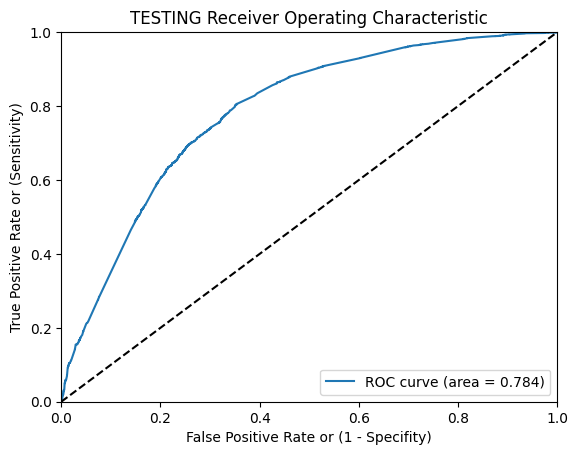

In [21]:
doClassification_NN(nn_model3, X_train_scaled, X_test_scaled, y_train, y_test)

In [22]:
# Define a new model with updated parameters  - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn_model4 = tf.keras.models.Sequential()

# First hidden layer
nn_model4.add(tf.keras.layers.Dense(units=30, activation="relu", input_dim=len(X.columns)))

# Second hidden layer
nn_model4.add(tf.keras.layers.Dense(units=25, activation="relu"))

# Third hidden layer
nn_model4.add(tf.keras.layers.Dense(units=15, activation="relu"))

# Fourth hidden layer
nn_model4.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Fifth hidden layer
nn_model4.add(tf.keras.layers.Dense(units=5, activation="relu"))

# Output layer
nn_model4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model4.summary()

# Compile the new model
nn_model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the new model
fit_model = nn_model4.fit(X_train_scaled, y_train, epochs=500)

# Evaluate the new model using the test data
model_loss, model_accuracy = nn_model4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                1350      
                                                                 
 dense_13 (Dense)            (None, 25)                775       
                                                                 
 dense_14 (Dense)            (None, 15)                390       
                                                                 
 dense_15 (Dense)            (None, 10)                160       
                                                                 
 dense_16 (Dense)            (None, 5)                 55        
                                                                 
 dense_17 (Dense)            (None, 1)                 6         
                                                                 
Total params: 2736 (10.69 KB)
Trainable params: 2736 (

268/268 [==============================] - 0s 1ms/step
TRAINING METRICS

    Train Confusion Matrix:
    [[ 8244  3801]
 [ 2807 10872]]

    Train Report:
                  precision    recall  f1-score   support

           0       0.75      0.68      0.71     12045
           1       0.74      0.79      0.77     13679

    accuracy                           0.74     25724
   macro avg       0.74      0.74      0.74     25724
weighted avg       0.74      0.74      0.74     25724

    



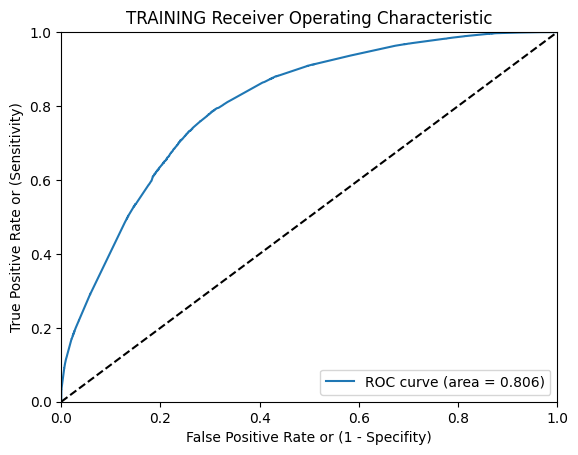



TESTING METRICS

    Test Confusion Matrix:
    [[2659 1334]
 [ 998 3584]]

    Test Report:
                  precision    recall  f1-score   support

           0       0.73      0.67      0.70      3993
           1       0.73      0.78      0.75      4582

    accuracy                           0.73      8575
   macro avg       0.73      0.72      0.72      8575
weighted avg       0.73      0.73      0.73      8575

    



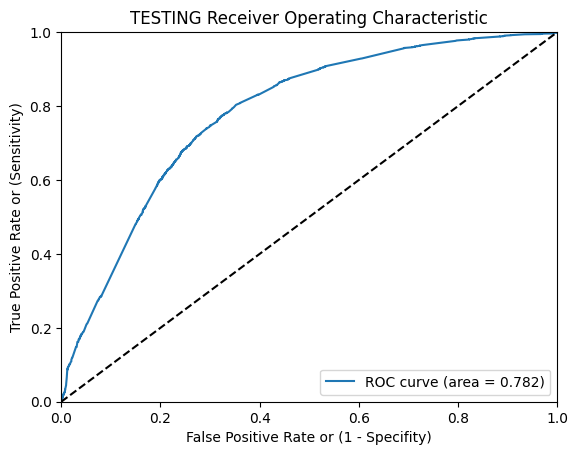

In [23]:
doClassification_NN(nn_model4, X_train_scaled, X_test_scaled, y_train, y_test)

In [24]:
# Export our model to HDF5 file
# It appears that the 4th model performed the best
nn_model1.save("AlphabetSoupCharity.h5")

In [25]:
# Export our model to HDF5 file
# It appears that the 4th model performed the best
nn_model4.save("AlphabetSoupCharity_Optimization.h5")